# SES722 - Partie 2 : Séries Temporelles
Romain Legrand - Rodolphe Simoneau 

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.linear_model import LinearRegression
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import durbin_watson

#### Question 1 
Importer les données du fichier quarterly.xls (corriger le problème éventuel d’observations manquantes)

In [2]:
df = pd.read_excel('quarterly.xls')
row_numbers, col_numbers = df.shape[0], df.shape[1]
print('Il y a %d lignes et %d colonnes dans les données.' % (row_numbers, col_numbers))

Il y a 212 lignes et 19 colonnes dans les données.


In [3]:
df.apply(lambda x: x.isna().sum())

DATE        0
FFR         0
Tbill       0
Tb1yr       0
r5          0
r10         0
PPINSA      0
Finished    0
CPI         0
CPICORE     0
M1NSA       0
M2SA        0
M2NSA       0
Unemp       0
IndProd     0
RGDP        0
Potent      0
Deflator    0
Curr        0
dtype: int64

In [4]:
print("il n'y aucune valeur manquante")

il n'y aucune valeur manquante


#### Question 2
Stationnariser la série de CPI en utilisant la méthode de régression qui inclue un terme de tendance dont la forme fonctionnelle est à choisir (linéaire, quadratique, log, exponentielle, ...)

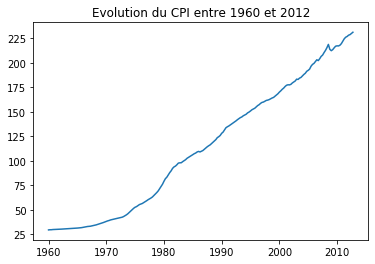

In [27]:
df['DATE'] = pd.to_datetime(df.DATE)
plt.plot(df['DATE'], df['CPI'])
plt.title("Evolution du CPI entre 1960 et 2012")

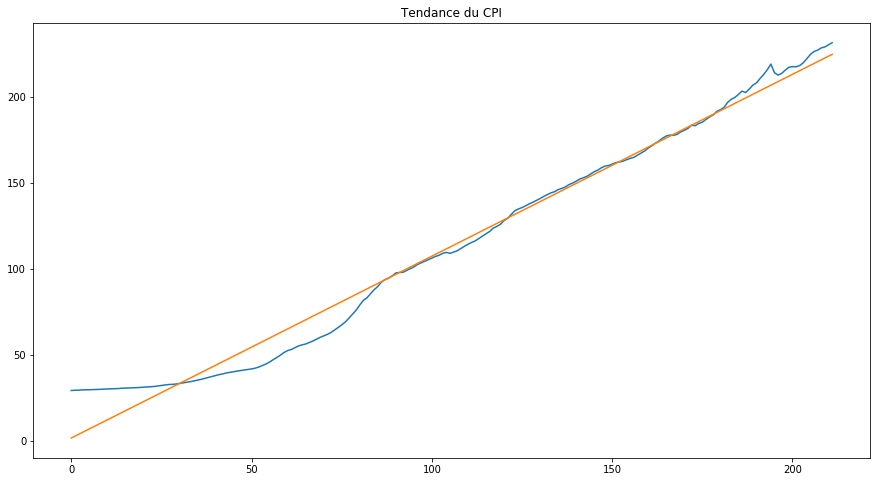

In [42]:
y = df.CPI
X = [i for i in range(0, len(y))]
X = np.reshape(X, (len(X), 1))

lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)
trend = lr.predict(X)
detrend = [y[i]-trend[i] for i in range(0, len(y))]

plt.figure(figsize=(15, 8))
plt.plot(y)
plt.plot(trend)
plt.title("Tendance du CPI");

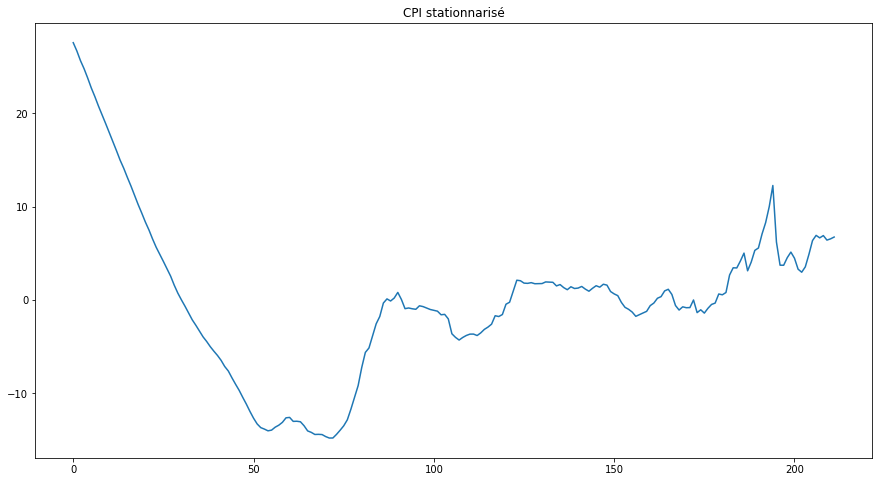

In [43]:
plt.figure(figsize=(15, 8))
plt.plot(detrend)
plt.title("CPI stationnarisé");

#### Question 3 
Stationnariser la série de CPI en utilisant un moyenne mobile centrée 5x5.

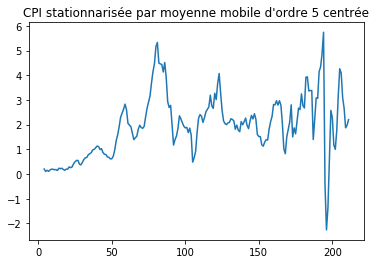

In [45]:
t = y.rolling(window=5).mean()
detrend = y-t

plt.plot(detrend)
plt.title("CPI stationnarisée par moyenne mobile d'ordre 5 centrée");

#### Question 4
Calculer inf, le taux d’inflation à partir de la variable CPI. Faire un graphique dans le temps de inf. Commentez.

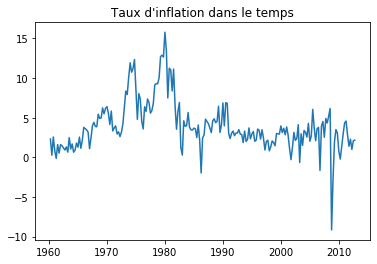

In [46]:
#calcul du taux d'inflation en utilisant la fonction pct_change() et en multipliant par 400 pour obtenir des données dans le même ordre de grandeur
df['inf'] = df['CPI'].pct_change()*400

plt.plot(df['DATE'], df['inf'])
plt.title("Taux d'inflation dans le temps");

#### Question 5 
Interpréter l'autocorrélogramme et l'autocorrélogrammes partiels de inf. Quelle est la différence entre ces deux graphiques ?


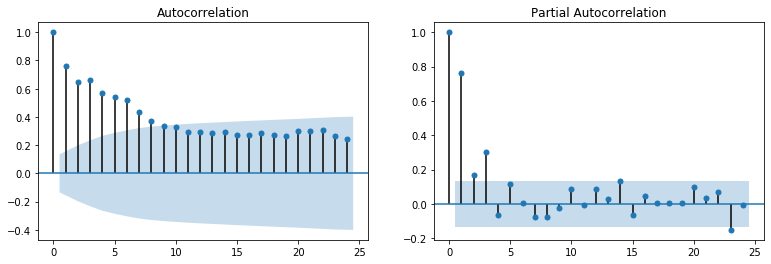

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(13,4))
fig = sm.graphics.tsa.plot_acf(df['inf'].dropna(), ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(df['inf'].dropna(), ax=axes[1])

### Question 7 
Faire le test Augmented Dickey Fuller pour inf en utilisant utilisant le critère AIC pour déterminer le nombre de lags à inclure. Commenter

In [47]:
# réalisation du test ADF en utilisant le critère AIC avec une constante
adf_inf_aic = adfuller(df['inf'].dropna(), autolag='AIC',regression='c')
adf_inf_aic

(-2.919055814337232,
 0.043176516871547096,
 2,
 208,
 {'1%': -3.4621857592784546,
  '5%': -2.875537986778846,
  '10%': -2.574231080806213},
 817.4131078108454)

In [48]:
print("Pvalue : ", adf_inf_aic[1])
print("Lags inclus " , (adf_inf_aic[2]))

Pvalue :  0.043176516871547096
Lags inclus  2


L'hypothèse nulle est que la série a été générée par un processus présentant une racine unitaire, et donc, qu'elle n'est pas stationnaire. On rejette cette hypothèse. Par ailleurs, le nombre de lags à inclure est 2.

#### Question 9 
Estimer le modèle de la courbe de Philips qui explique le taux de chômage (Unemp) en fonction du taux d’inflation courant et une constante.

Text(0.5, 0, 'Inflation')

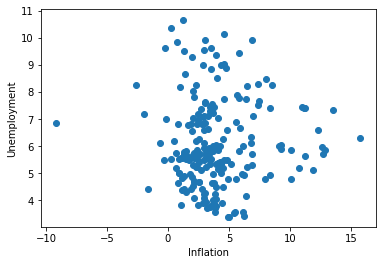

In [14]:
#Courbe de Philips
plt.scatter(df['inf'], df['Unemp'])
plt.ylabel('Unemployment')
plt.xlabel("Inflation")

In [60]:
X = pd.DataFrame(df['inf'].dropna())
y = pd.DataFrame(df['Unemp'][1:])
lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
print(lr.intercept_)

[6.07081892]


In [62]:
print(lr.coef_)

[[0.003977]]


#### Question 10 
Tester l’autocorrélation des erreurs.

In [64]:
predictions = lr.predict(X)
err = pd.DataFrame(df['Unemp'][1:]) - predictions

Test de Durbin Watson ? 

In [65]:
print("Valeur de la statistique de DW :", durbin_watson(err))

Valeur de la statistique de DW : [0.04419413]
